In [ ]:
# -------------------------------------------------- #
# Author: Jiayu Yang
# Date: 15 May 2023
# File Name: [Project CD] 1D FDM with Central, Artificial, Upwinding Scheme
# File Description: 
#    This file aims at solving the 1D steady convection-diffusion problems using the
#    Finite Difference Method (FDM) with respectively:
#        - Central Difference Scheme
#        - Artificial Difference Scheme
#        - Upwind Difference Scheme
#    The comparison of stability is also included.
# Web Link to Github: https://github.com/LakeYang0818/Solving-Convection-Diffusion-Problems
# -------------------------------------------------- #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

In [2]:
# ----------------- Exact Solver------------------#
def exact_solver(a, mu, s, u0, uN, N):
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))
    
    u_exact = np.zeros(N + 1)
    for i in range(N + 1):
        u_exact[i] = - s / (a * (np.exp(a / mu) - 1)) * (np.exp(a * xmesh[i] / mu) - 1) + s * xmesh[i] / a
    return u_exact

In [3]:
# -----------------FDM Method Pool------------------#
def FDM_Central(a, mu, s, u0, uN, N):
    
    # FDM Matrix A
    A = np.zeros((N + 1, N + 1))
    # Source S
    S = np.ones(N + 1) * s

    left  = - a * N / 2 - mu * (N ** 2)
    mid   = 2 * mu * (N ** 2)
    right = + a * N / 2 - mu * (N ** 2)

    for i in range(N + 1):
        if i == 0:
            A[i,   i  ] = mid
            A[i, i + 1] = right
        elif i == N:
            A[i, i - 1] = left
            A[i,   i  ] = mid
        else:
            A[i, i - 1] = left
            A[i,   i  ] = mid
            A[i, i + 1] = right

    u_sol = np.zeros(N + 1)
    u_sol[1:-1] = np.linalg.solve(A[1:-1, 1:-1], S[1:-1])
    u_sol[0]  = u0
    u_sol[-1] = uN
    return u_sol

def FDM_Artificial(a, mu, s, u0, uN, N):
    Pe = a / (2 * mu * N)
    beta = mpmath.coth(Pe) - 1 / Pe
    mu_sub = beta * mu * Pe
    
    # FDM Matrix A
    A = np.zeros((N + 1, N + 1))
    # Source S
    S = np.ones(N + 1)

    left  = - a * N / 2 - (mu + mu_sub) * (N ** 2)
    mid   = 2 * (mu + mu_sub) * (N ** 2)
    right = + a * N / 2 - (mu + mu_sub) * (N ** 2)

    for i in range(N + 1):
        if i == 0:
            A[i,   i  ] = mid
            A[i, i + 1] = right
        elif i == N:
            A[i, i - 1] = left
            A[i,   i  ] = mid
        else:
            A[i, i - 1] = left
            A[i,   i  ] = mid
            A[i, i + 1] = right
            
    u_sol = np.zeros(N + 1)
    u_sol[1:-1] = np.linalg.solve(A[1:-1, 1:-1], S[1:-1])
    u_sol[0]  = u0
    u_sol[-1] = uN
    
    return u_sol

def FDM_Upwind(a, mu, s, u0, uN, N):
    Pe = a / (2 * mu * N)
    beta = mpmath.coth(Pe) - 1 / Pe
    mu_sub = beta * mu * Pe
    
    # FDM Matrix A
    A = np.zeros((N + 1, N + 1))
    # Source S
    S = np.ones(N + 1)
    h = 1 / N

    left  = - (1 + beta) * a * N / 2 - mu * (N ** 2)
    mid   = a * beta * N + 2 * mu * (N ** 2)
    right = + (1 - beta) * a * N / 2 - mu * (N ** 2)
    
    for i in range(N + 1):
        if i == 0:
            A[i,   i  ] = mid
            A[i, i + 1] = right
        elif i == N:
            A[i, i - 1] = left
            A[i,   i  ] = mid
        else:
            A[i, i - 1] = left
            A[i,   i  ] = mid
            A[i, i + 1] = right
            
    u_sol = np.zeros(N + 1)
    u_sol[1:-1] = np.linalg.solve(A[1:-1, 1:-1], S[1:-1])
    u_sol[0]  = u0
    u_sol[-1] = uN    
    return u_sol

In [4]:
def simple_plot(method, a, mu, s, u0, uN, N, save):
    # X-axis
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))
    
    # Peclet number
    Pe = a / (2 * mu * N)
    
    # Exact Solution
    u_exact = exact_solver(a, mu, s, u0, uN, N)
    
    # Numerical Solution
    if method == 'FDM Central Scheme':
        u_numerical = FDM_Central(a, mu, s, u0, uN, N)
    elif method == 'FDM Artificial Scheme':
        u_numerical = FDM_Artificial(a, mu, s, u0, uN, N)
    elif method == 'FDM Upwind Scheme':
        u_numerical = FDM_Upwind(a, mu, s, u0, uN, N)
    
    plt.plot(xmesh, u_numerical, color = 'red',  marker = 'o',label = method)
    plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
    plt.title('%s v/s Exact Solution \n at $N = %s, P_e = %s$'%(method, N, Pe))
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/%s_Pe = %s_N = %s_Plot.png'%(method, Pe, N))
    plt.show()
    

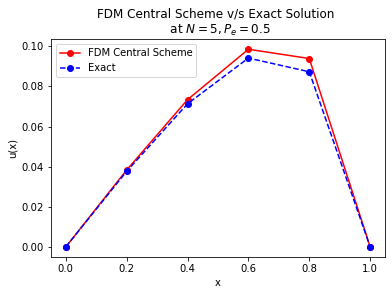

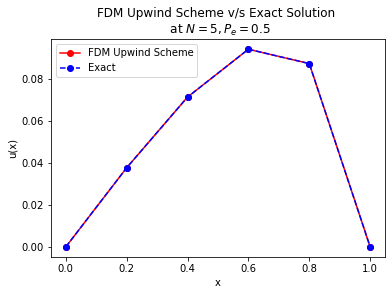

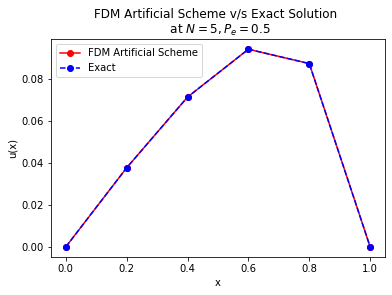

In [5]:
# Setup
a = 5
mu = 1
s = 1
u0 = 0
uN = 0
N = 5

# Simple Plot

simple_plot('FDM Central Scheme',    a, mu, s, u0, uN, N, False)
simple_plot('FDM Upwind Scheme',     a, mu, s, u0, uN, N, False)
simple_plot('FDM Artificial Scheme', a, mu, s, u0, uN, N, False)

In [16]:
# -----------------FDM Central Different Pe------------------#
def different_Pe_Plot(method, mu, s, u0, uN, N, save):
    # X-axis
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))
    
    Pe_choice = [0.25, 0.5, 1, 5]
    
    if method == 'FDM Central Scheme':
        for Pe in Pe_choice[:-1]:
            a = 2 * N * mu * Pe
            u_exact = exact_solver(a, mu, s, u0, uN, N)
            u_numer = FDM_Central(a, mu, s, u0, uN, N)
            plt.plot(xmesh, u_numer, color = 'red', marker = 'o')
            plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o')
            plt.text(xmesh[2], u_exact[-8], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
            
        Pe = Pe_choice[-1]
        a = 2 * N * mu * Pe
        u_numer = FDM_Central(a, mu, s, u0, uN, N)
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        plt.plot(xmesh, u_numer, color = 'red', label = method, marker = 'o')
        plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
        plt.text(xmesh[2], u_exact[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
    
    elif method == 'FDM Artificial Scheme':
        for Pe in Pe_choice[:-1]:
            a = 2 * N * mu * Pe
            u_exact = exact_solver(a, mu, s, u0, uN, N)
            u_numer = FDM_Artificial(a, mu, s, u0, uN, N)
            plt.plot(xmesh, u_numer, color = 'red', marker = 'o')
            plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o')
            plt.text(xmesh[2], u_exact[-8], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
            
        Pe = Pe_choice[-1]
        a = 2 * N * mu * Pe
        u_numer = FDM_Artificial(a, mu, s, u0, uN, N)
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        plt.plot(xmesh, u_numer, color = 'red', label = method, marker = 'o')
        plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
        plt.text(xmesh[2], u_exact[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
    
    elif method == 'FDM Upwind Scheme':
        for Pe in Pe_choice[:-1]:
            a = 2 * N * mu * Pe
            u_exact = exact_solver(a, mu, s, u0, uN, N)
            u_numer = FDM_Upwind(a, mu, s, u0, uN, N)
            plt.plot(xmesh, u_numer, color = 'red', marker = 'o')
            plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o')
            plt.text(xmesh[2], u_exact[-8], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
            
        Pe = Pe_choice[-1]
        a = 2 * N * mu * Pe
        u_numer = FDM_Upwind(a, mu, s, u0, uN, N)
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        plt.plot(xmesh, u_numer, color = 'red', label = method, marker = 'o')
        plt.plot(xmesh, u_exact, color = 'blue', linestyle='--', marker = 'o', label = 'Exact')
        plt.text(xmesh[2], u_exact[-5], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))

    plt.title('%s v/s Exact Solution\nDifferent Peclet Number under N = %s'%(method, N))
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/shapixiaokeai/Desktop/[P2] Convection-Diffusion Problem/Images Pool/%s_N = %s under different Pe.png'%(method, N))
    plt.show()
    

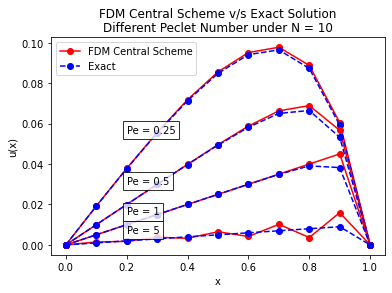

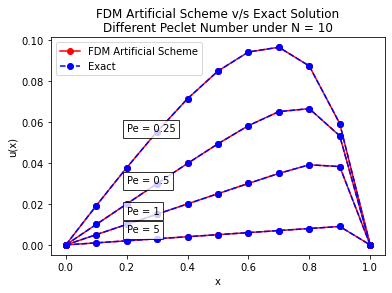

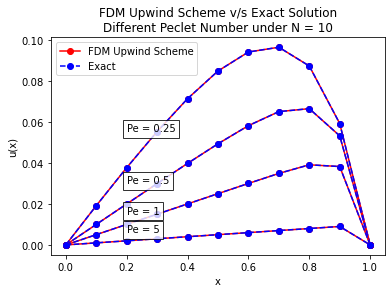

In [17]:
# Different Pe Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

different_Pe_Plot('FDM Central Scheme',    mu, s, u0, uN, N, False)
different_Pe_Plot('FDM Artificial Scheme', mu, s, u0, uN, N, False)
different_Pe_Plot('FDM Upwind Scheme',     mu, s, u0, uN, N, False)

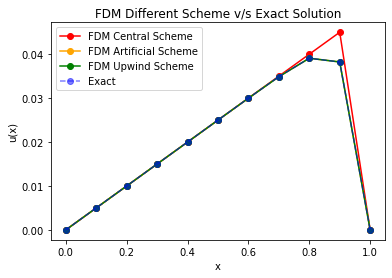

In [8]:
# -----------------Comparison of different schemes------------------#

# Setup
a = 20
mu = 1
s = 1
u0 = 0
uN = 0
N = 10
Pe = a / (2 * N * mu)

# X-Axis
xmesh = np.zeros(N)  # Mesh point
xmesh = list(i / N for i in range(len(xmesh) + 1))

u_cen = FDM_Central(a, mu, s, u0, uN, N)
u_art = FDM_Artificial(a, mu, s, u0, uN, N)
u_upw = FDM_Upwind(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)

plt.plot(xmesh, u_cen, 'red', marker = 'o',    label = 'FDM Central Scheme')
plt.plot(xmesh, u_art, 'orange', marker = 'o', label = 'FDM Artificial Scheme')
plt.plot(xmesh, u_upw, 'green', marker = 'o',  label = 'FDM Upwind Scheme')

plt.plot(xmesh, u_exact, 'blue', linestyle='--', marker = 'o', label = 'Exact', alpha = 0.5)
plt.title('FDM Different Scheme v/s Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
#plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/Comparison of FDM Central, Artificial, Upwind Difference Scheme at Pe = %s N = %s.png'%(Pe, N))
plt.show()

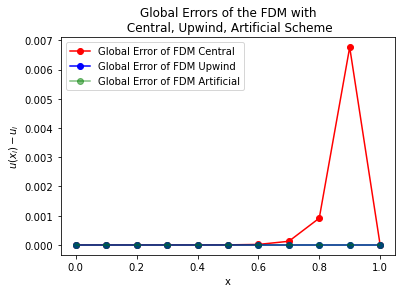

In [9]:
# Errors Plot
err_cen = abs(u_cen - u_exact)
err_upw = abs(u_upw - u_exact)
err_art = abs(u_art - u_exact)

plt.plot(xmesh, err_cen, 'r-', marker = 'o', label = 'Global Error of FDM Central')
plt.plot(xmesh, err_upw, 'b-', marker = 'o', label = 'Global Error of FDM Upwind')
plt.plot(xmesh, err_art, 'g-', marker = 'o', label = 'Global Error of FDM Artificial', alpha = 0.5)

plt.title('Global Errors of the FDM with\n Central, Upwind, Artificial Scheme')
plt.xlabel('x')
plt.ylabel('$u(x_i) - u_i$')
plt.legend()
plt.show()

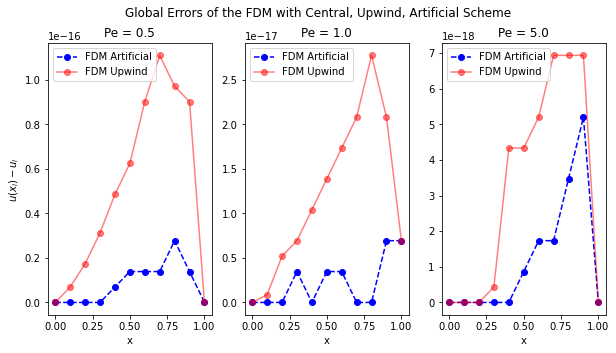

In [10]:
# Errors Plot

# Setup
a = 100
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

# X-Axis
xmesh = np.zeros(N)  # Mesh point
xmesh = list(i / N for i in range(len(xmesh) + 1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Global Errors of the FDM with Central, Upwind, Artificial Scheme')

# First Plot
a = 10
Pe = a / (2 * N * mu)
u_art = FDM_Artificial(a, mu, s, u0, uN, N)
u_upw = FDM_Upwind(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)
err_upw = abs(u_upw - u_exact)
err_art = abs(u_art - u_exact)

ax1.plot(xmesh, err_art, 'b', linestyle = '--', marker = 'o', label = 'FDM Artificial')
ax1.plot(xmesh, err_upw, 'r', marker = 'o', alpha = 0.5, label = 'FDM Upwind')
ax1.set_title('Pe = %s'%Pe)
ax1.set_xlabel('x')
ax1.set_ylabel('$u(x_i) - u_i$')
ax1.legend()

# Second Plot
a = 20
Pe = a / (2 * N * mu)
u_art = FDM_Artificial(a, mu, s, u0, uN, N)
u_upw = FDM_Upwind(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)
err_upw = abs(u_upw - u_exact)
err_art = abs(u_art - u_exact)

ax2.plot(xmesh, err_art, 'b', linestyle = '--', marker = 'o', label = 'FDM Artificial')
ax2.plot(xmesh, err_upw, 'r', marker = 'o', alpha = 0.5, label = 'FDM Upwind')
ax2.set_title('Pe = %s'%Pe)
ax2.set_xlabel('x')
ax2.legend()

# Third Plot
a = 100
Pe = a / (2 * N * mu)
u_art = FDM_Artificial(a, mu, s, u0, uN, N)
u_upw = FDM_Upwind(a, mu, s, u0, uN, N)
u_exact = exact_solver(a, mu, s, u0, uN, N)
err_upw = abs(u_upw - u_exact)
err_art = abs(u_art - u_exact)

ax3.plot(xmesh, err_art, 'b', linestyle = '--', marker = 'o', label = 'FDM Artificial')
ax3.plot(xmesh, err_upw, 'r', marker = 'o', alpha = 0.5, label = 'FDM Upwind')
ax3.set_title('Pe = %s'%Pe)
ax3.set_xlabel('x')
ax3.legend()

#plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/Global Errors of FDM Artificial and Upwind Difference Scheme.png')
plt.show()

In [11]:
# -----------------FDM Central Different Pe------------------#
def different_Pe_different_methods_Plot(mu, s, u0, uN, N, save):
    xmesh = np.zeros(N)  # Mesh point
    xmesh = list(i / N for i in range(len(xmesh) + 1))   
    Pe_choice = [5, 10, 20, 50]
    
    
    plt.figure(figsize = (10, 5))
    for Pe in Pe_choice[:-1]:
        a = 2 * N * mu * Pe
        u_exact = exact_solver(a, mu, s, u0, uN, N)
        
        u_cente = FDM_Central(a, mu, s, u0, uN, N)
        u_artif = FDM_Artificial(a, mu, s, u0, uN, N)
        u_upwin = FDM_Upwind(a, mu, s, u0, uN, N)
        
        plt.plot(xmesh, u_exact, color = 'blue', marker = 'o')
        
        plt.plot(xmesh, u_cente, color = 'red', linestyle='-')
        plt.plot(xmesh, u_artif, color = 'green', linestyle='-')
        plt.plot(xmesh, u_upwin, color = 'purple', linestyle='-')

        plt.text(xmesh[2], u_exact[-7], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))

    Pe = Pe_choice[-1]
    a = 2 * N * mu * Pe
    
    u_cente = FDM_Central(a, mu, s, u0, uN, N)
    
    u_exact = exact_solver(a, mu, s, u0, uN, N)
    u_artif = FDM_Artificial(a, mu, s, u0, uN, N)
    u_upwin = FDM_Upwind(a, mu, s, u0, uN, N)
    
    plt.plot(xmesh, u_exact, color = 'blue', marker = 'o', label = 'Exact')

    plt.plot(xmesh, u_cente, color = 'red',   linestyle='-', label = 'FDM Central')
    plt.plot(xmesh, u_artif, color = 'green', linestyle='-', label = 'FDM Artificial')
    plt.plot(xmesh, u_upwin, color = 'purple', linestyle='-', label = 'FDM Upwind')
        
    plt.text(xmesh[2], u_exact[-10], 'Pe = %s'%Pe, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title('FDM Schemes Under Different Peclet Number at N = %s'%N)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    if save == True:
        plt.savefig('/Users/pc/Desktop/[P2] Convection-Diffusion Problem/Images Pool/Differnt FDM Schemes under different Pe at N = %s.png'%N)
    plt.show()
    

/var/folders/kw/h_nrm_y92yn6h074z_crl2000000gn/T/ipykernel_45682/2933238865.py:8: RuntimeWarning: overflow encountered in exp
  u_exact[i] = - s / (a * (np.exp(a / mu) - 1)) * (np.exp(a * xmesh[i] / mu) - 1) + s * xmesh[i] / a
/var/folders/kw/h_nrm_y92yn6h074z_crl2000000gn/T/ipykernel_45682/2933238865.py:8: RuntimeWarning: invalid value encountered in double_scalars
  u_exact[i] = - s / (a * (np.exp(a / mu) - 1)) * (np.exp(a * xmesh[i] / mu) - 1) + s * xmesh[i] / a


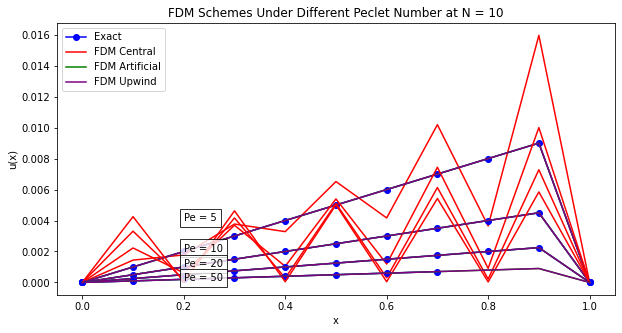

In [12]:
# Different Pe and Different Methods Plot

# Setup
mu = 1
s = 1
u0 = 0
uN = 0
N = 10

different_Pe_different_methods_Plot(mu, s, u0, uN, N, False)